In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [180]:
data = pd.read_csv("data2.txt", header=None)

In [181]:
X = np.array(data[0]).reshape(-1, 1)
Y = np.array(data[1]).reshape(-1, 1)

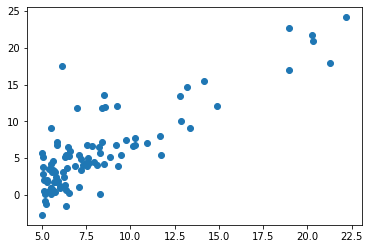

In [182]:
plt.scatter(X,Y)

Normal Equation Solution

In [183]:
X_b = np.c_[np.ones((97, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
print(f'slope = {theta_best[0]}, intercept = {theta_best[1]}')

slope = [-3.89578088], intercept = [1.19303364]


Sklearn Linear Regression

In [289]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
print(f'slope = {lin_reg.intercept_}, intercept = {lin_reg.coef_}')

slope = [-3.89578088], intercept = [[1.19303364]]


Gradient Descent Approach : Batch

In [126]:
def cost(params, x, y):
    m = len(y)
    predictions = x.dot(params)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

In [112]:
def gradient_descent(x, y, params, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    params_history = np.zeros((iterations, 2))

    for i in range(iterations):
        prediction = np.dot(x, params)
        params = params - (1/m)*learning_rate*(x.T.dot((prediction - y)))
        params_history[i,:] = params.T
        cost_history[i] = cal_cost(params, x, y)
  
    return theta, cost_history

In [203]:
params = np.random.randn(2, 1)
iterations = 1000
theta, cost_history = gradient_descent(X_b, Y, params, 0.01, iterations)

In [204]:
print(f"slope:{theta[0]}, intercept:{theta[1]}")

slope:[-3.36590736], intercept:[1.1398021]


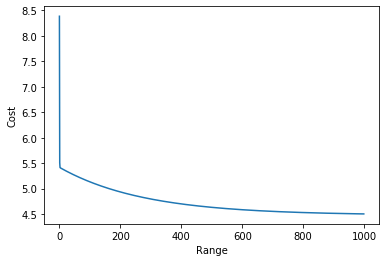

In [205]:
plt.xlabel("Range")
plt.ylabel("Cost")
plt.plot(range(iterations), cost_history)

Stochastic Gradient Descent

In [197]:
def stochastic_gradient_descent(x, y, params, learning_rate=0.01 ,iterations=100):
    m = len(y)
    cost_history_sgd = np.zeros(iterations)

    for r in range(iterations):
        cost = 0
    for i in range(m):
        rand_ind = np.random.randint(0, m)
        x_iter = x[rand_ind,:].reshape(1,x.shape[1])
        y_iter = y[rand_ind].reshape(1, 1)
        pred = np.dot(x_iter, params)
        params = params - (1/m)*learning_rate*(x_iter.T.dot((pred - y_iter)))
        cost += cal_cost(params, x_iter, y_iter)
        cost_history_sgd[r] = cost 
  
    return params, cost_history_sgd

In [200]:
new_params = np.random.randn(2,1)
new_iterations = 500
params_sgd, cost_history_sgd = stochastic_gradient_descent(X_b, Y, new_params, 0.1, new_iterations)

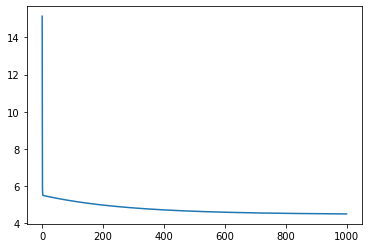

In [202]:
plt.plot(range(iterations), cost_history)